SL, UL, RL

In [1]:
%matplotlib inline

In [3]:
import matplotlib.pyplot as plt
from time import time
import numpy as np
import pandas as pd
import tensorflow as tf
from IPython.display import SVG

from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout
from keras.optimizers import SGD
from keras.callbacks import TensorBoard, ModelCheckpoint
from keras.utils import plot_model
from keras.utils.vis_utils import model_to_dot

seed = 0
np.random.seed(seed)

In [4]:
x = np.array([
    [2, 5, 7, 9, 1, 4, 6, 8],
    [4, 3.8, 3.5, 3] * 2,
]).T
y = np.array([1] * 4 + [0] * 4)[:, None]
y_ohe = np.eye(2)[y.ravel()]

In [5]:
x.shape

(8, 2)

In [6]:
y.shape

(8, 1)

In [7]:
import matplotlib.lines as mlines
def newline(p1, p2):
    ax = plt.gca()
    xmin, xmax = ax.get_xbound()

    if(p2[0] == p1[0]):
        xmin = xmax = p1[0]
        ymin, ymax = ax.get_ybound()
    else:
        ymax = p1[1]+(p2[1]-p1[1])/(p2[0]-p1[0])*(xmax-p1[0])
        ymin = p1[1]+(p2[1]-p1[1])/(p2[0]-p1[0])*(xmin-p1[0])

    l = mlines.Line2D([xmin,xmax], [ymin,ymax])
    ax.add_line(l)
    return l

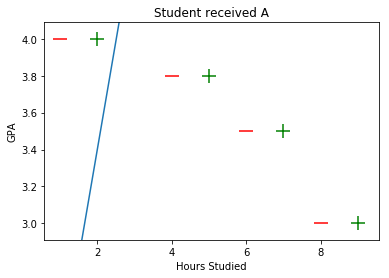

In [8]:
cols = ['GPA', 'HoursStudied', 'GotA']
df = pd.DataFrame(
    {
        cols[0]: [4, 3.8, 3.5, 3] * 2,
        cols[1]: [2, 5, 7, 9, 1, 4, 6, 8],
        cols[2]: [True] * 4 + [False] * 4
    })
df = df.sample(n=len(df), random_state=0)[cols]
colors = {True: 'green', False: 'red'}
markers = {True: '+', False: '_'}

for class_ in colors:
    df_ = df[df[cols[2]] == class_]
    _ = plt.scatter(df_[cols[1]], df_[cols[0]],
                    s=200,
                c=colors[class_],
                marker=markers[class_]
               )
plt.title('Student received A')
plt.xlabel('Hours Studied')
plt.ylabel(cols[0])
# plt.xlim([-5, 10])
# plt.ylim([-5, 5])


w1=-0.375; w2 = 0.441; b = 0.394

newline([0, -b / w1], [-b / w2, 0])
# newline([8.7, 3], [4.7, 3.8])
plt.show()

### Multi Layer Perceptron

In [5]:
class SingleLayerPerceptron:
    def __init__(self,
                 learning_rate,
                 hidden_units,
                 n_features):
        n_classes = 2
        self.features = tf.placeholder("float",
                                       [None, n_features])
        self.targets = tf.placeholder("float",
                                      [None, n_classes])
        w_hidden = tf.Variable(tf.random_normal([n_features,
                                                 hidden_units]))
        w_out = tf.Variable(tf.random_normal([hidden_units,
                                              n_classes]))
        b_hidden = tf.Variable(tf.random_normal([hidden_units]))
        b_out = tf.Variable(tf.random_normal([n_classes]))
        
        layer_hidden = tf.add(tf.matmul(self.features,
                                        w_hidden), b_hidden)
        layer_hidden = tf.nn.relu(layer_hidden)
        self.logits = tf.matmul(layer_hidden, w_out) + b_out
        self.loss_op = tf.reduce_mean(
        tf.nn.sigmoid_cross_entropy_with_logits(
            logits=self.logits, labels=self.targets))
        optimizer = tf.train.AdamOptimizer(learning_rate=learning_rate)
        self.train_op = optimizer.minimize(self.loss_op)
        
    def fit(self, x, y, epochs=100, verbose=True, print_every=1):
        y = np.eye(2)[y.ravel()]
        
        accuracies = []
        losses = []
        output_string = 'Epoch: {:4d}, accuracy: {:6.3f}, cost: {:.2f}'

        with tf.Session() as sess:
            init = tf.global_variables_initializer()
            sess.run(init)

            for epoch in range(epochs):
                _, loss = sess.run([self.train_op, self.loss_op],
                                   feed_dict={self.features: x,
                                              self.targets: y})
                

                pred = tf.nn.sigmoid(self.logits)
                is_correct = tf.equal(tf.argmax(pred, 1),
                                      tf.argmax(self.targets, 1))
                accuracy_op = tf.reduce_mean(
                    tf.cast(is_correct, "float"))
                accuracy = accuracy_op.eval({self.features: x,
                                        self.targets: y})

                if verbose and (epoch + 1) % print_every == 0:
                    print(output_string.format(epoch + 1,
                                               accuracy,
                                               loss))
                losses.append(loss)
                accuracies.append(accuracy)
                
        return accuracies, losses

In [14]:
learning_rate = 0.1
epochs = 250
hidden_units = 256
n_features = 2

slp = SingleLayerPerceptron(learning_rate,
                            hidden_units,
                            n_features)
accuracies, costs = slp.fit(x, y, epochs=epochs)

Epoch:    1, accuracy:  0.500, cost: 20.33
Epoch:    2, accuracy:  0.500, cost: 53.60
Epoch:    3, accuracy:  0.625, cost: 46.84
Epoch:    4, accuracy:  0.500, cost: 22.50
Epoch:    5, accuracy:  0.625, cost: 14.83
Epoch:    6, accuracy:  0.500, cost: 21.62
Epoch:    7, accuracy:  0.500, cost: 23.32
Epoch:    8, accuracy:  0.500, cost: 22.85
Epoch:    9, accuracy:  0.625, cost: 10.04
Epoch:   10, accuracy:  0.625, cost: 11.35
Epoch:   11, accuracy:  0.625, cost: 15.42
Epoch:   12, accuracy:  0.625, cost: 12.84
Epoch:   13, accuracy:  0.500, cost: 17.91
Epoch:   14, accuracy:  0.625, cost: 14.64
Epoch:   15, accuracy:  0.500, cost: 4.01
Epoch:   16, accuracy:  0.500, cost: 12.84
Epoch:   17, accuracy:  0.375, cost: 20.10
Epoch:   18, accuracy:  0.500, cost: 18.39
Epoch:   19, accuracy:  0.750, cost: 10.14
Epoch:   20, accuracy:  0.500, cost: 3.38
Epoch:   21, accuracy:  0.500, cost: 10.80
Epoch:   22, accuracy:  0.750, cost: 10.41
Epoch:   23, accuracy:  0.750, cost: 3.37
Epoch:   24, a

Epoch:  197, accuracy:  1.000, cost: 0.10
Epoch:  198, accuracy:  1.000, cost: 0.10
Epoch:  199, accuracy:  1.000, cost: 0.10
Epoch:  200, accuracy:  1.000, cost: 0.10
Epoch:  201, accuracy:  1.000, cost: 0.10
Epoch:  202, accuracy:  1.000, cost: 0.10
Epoch:  203, accuracy:  1.000, cost: 0.10
Epoch:  204, accuracy:  1.000, cost: 0.10
Epoch:  205, accuracy:  1.000, cost: 0.10
Epoch:  206, accuracy:  1.000, cost: 0.09
Epoch:  207, accuracy:  1.000, cost: 0.09
Epoch:  208, accuracy:  1.000, cost: 0.09
Epoch:  209, accuracy:  1.000, cost: 0.09
Epoch:  210, accuracy:  1.000, cost: 0.09
Epoch:  211, accuracy:  1.000, cost: 0.09
Epoch:  212, accuracy:  1.000, cost: 0.09
Epoch:  213, accuracy:  1.000, cost: 0.09
Epoch:  214, accuracy:  1.000, cost: 0.09
Epoch:  215, accuracy:  1.000, cost: 0.09
Epoch:  216, accuracy:  1.000, cost: 0.09
Epoch:  217, accuracy:  1.000, cost: 0.09
Epoch:  218, accuracy:  1.000, cost: 0.09
Epoch:  219, accuracy:  1.000, cost: 0.09
Epoch:  220, accuracy:  1.000, cos

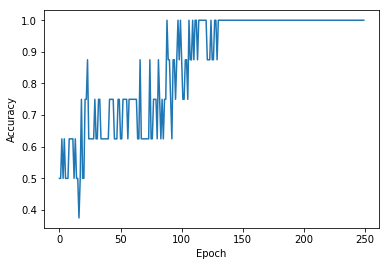

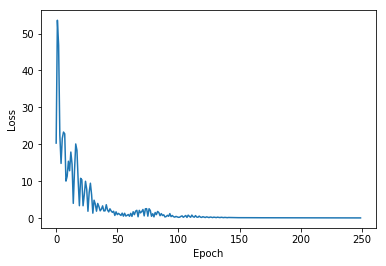

In [15]:
plt.plot(range(epochs), accuracies)
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.show()
_ = plt.plot(range(epochs), costs)
plt.xlabel('Epoch')
_ = plt.ylabel('Loss')

### MLP
http://deeplearning.net/tutorial/mlp.html

Keras

In [7]:
class MultiLayerPerceptronKeras:
    def __init__(self,
                 hidden_units,
                 activation='relu'
                ):
        self.history = None
        self.model = Sequential()
        for index, units in enumerate(hidden_units):
            if index == 0:
                self.model.add(Dense(units,
                                     input_dim=2,
                                     activation=activation))
            else:
                self.model.add(Dense(units, activation=activation))
            
        self.model.add(Dense(2, activation='sigmoid'))
        self.model.compile(loss='binary_crossentropy',
                      optimizer='adam',
                      metrics=['accuracy'])
        print(self.model.summary())
        
    def plot_history(self):
        if self.history:
            epochs = len(self.history.history['loss'])
            plt.plot(range(1, epochs + 1), self.history.history['loss'])
            plt.xlabel('Epoch')
            plt.ylabel('Loss')
            plt.show()
            plt.plot(range(1, epochs + 1), self.history.history['acc']);
            plt.xlabel('Epoch')
            plt.ylabel('Accuracy');
        
    def fit(self, x, y, epochs=100):
        tensorboard = TensorBoard(log_dir="logs/{}".format(time()),
                                  histogram_freq=10)
        saver = tf.train.Saver()
        history = self.model.fit(x, y,
                                 epochs=epochs,
                                 validation_data=(x, y),
                                 callbacks=[tensorboard]
                                )
        self.history = history
        return history
    
    def plot_model(self):
        return SVG(model_to_dot(self.model).create(prog='dot',
                                                   format='svg'))

In [8]:
mlp = MultiLayerPerceptronKeras(hidden_units=(256, ),
                                activation='relu')

Instructions for updating:
keep_dims is deprecated, use keepdims instead
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 256)               768       
_________________________________________________________________
dense_2 (Dense)              (None, 2)                 514       
Total params: 1,282.0
Trainable params: 1,282
Non-trainable params: 0.0
_________________________________________________________________
None


In [10]:
plot_model(mlp.model, 'model.png')

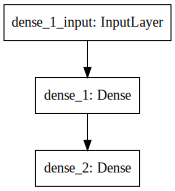

In [9]:
mlp.plot_model()

Train on 8 samples, validate on 8 samples
INFO:tensorflow:Summary name dense_1/kernel:0 is illegal; using dense_1/kernel_0 instead.
INFO:tensorflow:Summary name dense_1/bias:0 is illegal; using dense_1/bias_0 instead.
INFO:tensorflow:Summary name dense_2/kernel:0 is illegal; using dense_2/kernel_0 instead.
INFO:tensorflow:Summary name dense_2/bias:0 is illegal; using dense_2/bias_0 instead.
Epoch 1/250
Epoch 00000: val_loss improved from inf to 0.68949, saving model to weights.hdf5
8/8 [==============================] - 0s - loss: 0.6976 - acc: 0.5625 - val_loss: 0.6895 - val_acc: 0.5000
Epoch 2/250
Epoch 00001: val_loss improved from 0.68949 to 0.68557, saving model to weights.hdf5
8/8 [==============================] - 0s - loss: 0.6895 - acc: 0.5000 - val_loss: 0.6856 - val_acc: 0.5000
Epoch 3/250
Epoch 00002: val_loss improved from 0.68557 to 0.68477, saving model to weights.hdf5
8/8 [==============================] - 0s - loss: 0.6856 - acc: 0.5000 - val_loss: 0.6848 - val_acc: 0.

8/8 [==============================] - 0s - loss: 0.6687 - acc: 0.5000 - val_loss: 0.6684 - val_acc: 0.5000
Epoch 40/250
Epoch 00039: val_loss improved from 0.66843 to 0.66819, saving model to weights.hdf5
8/8 [==============================] - 0s - loss: 0.6684 - acc: 0.5000 - val_loss: 0.6682 - val_acc: 0.5000
Epoch 41/250
Epoch 00040: val_loss improved from 0.66819 to 0.66797, saving model to weights.hdf5
8/8 [==============================] - 0s - loss: 0.6682 - acc: 0.5000 - val_loss: 0.6680 - val_acc: 0.5000
Epoch 42/250
Epoch 00041: val_loss improved from 0.66797 to 0.66776, saving model to weights.hdf5
8/8 [==============================] - 0s - loss: 0.6680 - acc: 0.5000 - val_loss: 0.6678 - val_acc: 0.5000
Epoch 43/250
Epoch 00042: val_loss improved from 0.66776 to 0.66754, saving model to weights.hdf5
8/8 [==============================] - 0s - loss: 0.6678 - acc: 0.5000 - val_loss: 0.6675 - val_acc: 0.5625
Epoch 44/250
Epoch 00043: val_loss improved from 0.66754 to 0.66735,

8/8 [==============================] - 0s - loss: 0.6593 - acc: 0.6250 - val_loss: 0.6590 - val_acc: 0.6250
Epoch 80/250
Epoch 00079: val_loss improved from 0.65899 to 0.65872, saving model to weights.hdf5
8/8 [==============================] - 0s - loss: 0.6590 - acc: 0.6250 - val_loss: 0.6587 - val_acc: 0.6250
Epoch 81/250
Epoch 00080: val_loss improved from 0.65872 to 0.65853, saving model to weights.hdf5
8/8 [==============================] - 0s - loss: 0.6587 - acc: 0.6250 - val_loss: 0.6585 - val_acc: 0.6250
Epoch 82/250
Epoch 00081: val_loss improved from 0.65853 to 0.65827, saving model to weights.hdf5
8/8 [==============================] - 0s - loss: 0.6585 - acc: 0.6250 - val_loss: 0.6583 - val_acc: 0.6250
Epoch 83/250
Epoch 00082: val_loss improved from 0.65827 to 0.65799, saving model to weights.hdf5
8/8 [==============================] - 0s - loss: 0.6583 - acc: 0.6250 - val_loss: 0.6580 - val_acc: 0.6250
Epoch 84/250
Epoch 00083: val_loss improved from 0.65799 to 0.65766,

8/8 [==============================] - 0s - loss: 0.6475 - acc: 0.6250 - val_loss: 0.6472 - val_acc: 0.6250
Epoch 120/250
Epoch 00119: val_loss improved from 0.64716 to 0.64688, saving model to weights.hdf5
8/8 [==============================] - 0s - loss: 0.6472 - acc: 0.6250 - val_loss: 0.6469 - val_acc: 0.6250
Epoch 121/250
Epoch 00120: val_loss improved from 0.64688 to 0.64651, saving model to weights.hdf5
8/8 [==============================] - 0s - loss: 0.6469 - acc: 0.6250 - val_loss: 0.6465 - val_acc: 0.6250
Epoch 122/250
Epoch 00121: val_loss improved from 0.64651 to 0.64614, saving model to weights.hdf5
8/8 [==============================] - 0s - loss: 0.6465 - acc: 0.6250 - val_loss: 0.6461 - val_acc: 0.6250
Epoch 123/250
Epoch 00122: val_loss improved from 0.64614 to 0.64582, saving model to weights.hdf5
8/8 [==============================] - 0s - loss: 0.6461 - acc: 0.6250 - val_loss: 0.6458 - val_acc: 0.6250
Epoch 124/250
Epoch 00123: val_loss improved from 0.64582 to 0.6

8/8 [==============================] - 0s - loss: 0.6331 - acc: 0.6250 - val_loss: 0.6327 - val_acc: 0.6250
Epoch 160/250
Epoch 00159: val_loss improved from 0.63275 to 0.63233, saving model to weights.hdf5
8/8 [==============================] - 0s - loss: 0.6327 - acc: 0.6250 - val_loss: 0.6323 - val_acc: 0.6250
Epoch 161/250
Epoch 00160: val_loss improved from 0.63233 to 0.63193, saving model to weights.hdf5
8/8 [==============================] - 0s - loss: 0.6323 - acc: 0.6250 - val_loss: 0.6319 - val_acc: 0.6250
Epoch 162/250
Epoch 00161: val_loss improved from 0.63193 to 0.63155, saving model to weights.hdf5
8/8 [==============================] - 0s - loss: 0.6319 - acc: 0.6250 - val_loss: 0.6315 - val_acc: 0.6250
Epoch 163/250
Epoch 00162: val_loss improved from 0.63155 to 0.63117, saving model to weights.hdf5
8/8 [==============================] - 0s - loss: 0.6315 - acc: 0.6250 - val_loss: 0.6312 - val_acc: 0.6250
Epoch 164/250
Epoch 00163: val_loss improved from 0.63117 to 0.6

8/8 [==============================] - 0s - loss: 0.6164 - acc: 0.7500 - val_loss: 0.6159 - val_acc: 0.7500
Epoch 200/250
Epoch 00199: val_loss improved from 0.61586 to 0.61539, saving model to weights.hdf5
8/8 [==============================] - 0s - loss: 0.6159 - acc: 0.7500 - val_loss: 0.6154 - val_acc: 0.7500
Epoch 201/250
Epoch 00200: val_loss improved from 0.61539 to 0.61493, saving model to weights.hdf5
8/8 [==============================] - 0s - loss: 0.6154 - acc: 0.7500 - val_loss: 0.6149 - val_acc: 0.7500
Epoch 202/250
Epoch 00201: val_loss improved from 0.61493 to 0.61451, saving model to weights.hdf5
8/8 [==============================] - 0s - loss: 0.6149 - acc: 0.7500 - val_loss: 0.6145 - val_acc: 0.7500
Epoch 203/250
Epoch 00202: val_loss improved from 0.61451 to 0.61413, saving model to weights.hdf5
8/8 [==============================] - 0s - loss: 0.6145 - acc: 0.7500 - val_loss: 0.6141 - val_acc: 0.7500
Epoch 204/250
Epoch 00203: val_loss improved from 0.61413 to 0.6

8/8 [==============================] - 0s - loss: 0.5973 - acc: 0.8125 - val_loss: 0.5969 - val_acc: 0.8125
Epoch 240/250
Epoch 00239: val_loss improved from 0.59688 to 0.59646, saving model to weights.hdf5
8/8 [==============================] - 0s - loss: 0.5969 - acc: 0.8125 - val_loss: 0.5965 - val_acc: 0.8125
Epoch 241/250
Epoch 00240: val_loss improved from 0.59646 to 0.59593, saving model to weights.hdf5
8/8 [==============================] - 0s - loss: 0.5965 - acc: 0.8125 - val_loss: 0.5959 - val_acc: 0.7500
Epoch 242/250
Epoch 00241: val_loss improved from 0.59593 to 0.59539, saving model to weights.hdf5
8/8 [==============================] - 0s - loss: 0.5959 - acc: 0.7500 - val_loss: 0.5954 - val_acc: 0.7500
Epoch 243/250
Epoch 00242: val_loss improved from 0.59539 to 0.59482, saving model to weights.hdf5
8/8 [==============================] - 0s - loss: 0.5954 - acc: 0.7500 - val_loss: 0.5948 - val_acc: 0.7500
Epoch 244/250
Epoch 00243: val_loss improved from 0.59482 to 0.5

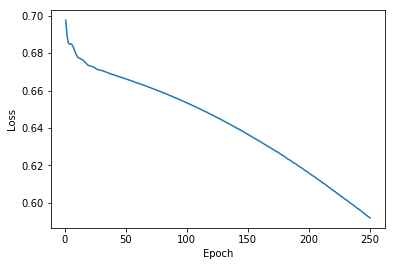

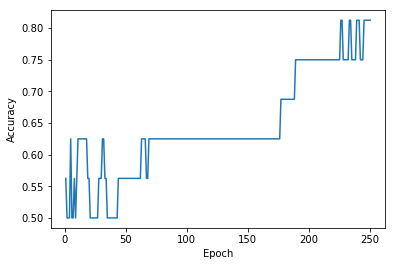

In [10]:
epochs = 250
mlp.fit(x, y_ohe, epochs=epochs)
mlp.plot_history()

In [299]:
def plot2(X, Y, clf):
    h = .01  # step size in the mesh

    # Create color maps
    cmap_light = mcolors.ListedColormap(['#FFAAAA', '#FFFFFF', '#AAFFAA'])
    cmap_bold = mcolors.ListedColormap(['#FF0000', '#00FF00', '#0000FF'])

    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])

    # Put the result into a color plot
    Z = Z.reshape(xx.shape)
    plt.figure()
    plt.pcolormesh(xx, yy, Z, cmap=cmap_light)

    # Plot also the training points
    plt.scatter(X[:4, 0], X[:4, 1], c='g', s=200, marker='+')
    plt.scatter(X[4:, 0], X[4:, 1], c='r', s=200, marker='_')
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())
    plt.xlabel('Hours studied')
    plt.ylabel('GPA')

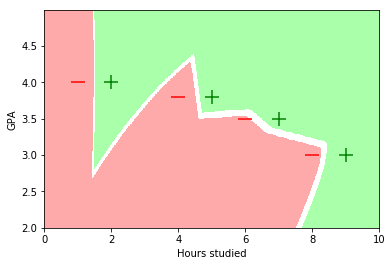

In [300]:
plot2(x, y, mlp.model)

In [ ]:
Bias variance and model complexity

In [ ]:
Model complexity graph

### Tuning

http://ruder.io/optimizing-gradient-descent/index.html#rmsprop

https://classroom.udacity.com/nanodegrees/nd889/parts/16cf5df5-73f0-4afa-93a9-de5974257236/modules/9da6b5e3-590a-40b9-bb5b-f67b66ef2930/lessons/fa6a2e47-7406-49d5-9f0f-17100c65c888/concepts/63add149-8f5c-4362-87ef-75c080592a4c

https://classroom.udacity.com/nanodegrees/nd889/parts/16cf5df5-73f0-4afa-93a9-de5974257236/modules/9da6b5e3-590a-40b9-bb5b-f67b66ef2930/lessons/fa6a2e47-7406-49d5-9f0f-17100c65c888/concepts/6d3834cc-b5be-442b-9581-1c5fcf1615a8

https://arxiv.org/pdf/1206.5533.pdf

http://neuralnetworksanddeeplearning.com/chap3.html#how_to_choose_a_neural_network's_hyper-parameters

http://yann.lecun.com/exdb/publis/pdf/lecun-98b.pdf

In [ ]:
Regularization

In [ ]:
Dropout
https://www.cs.toronto.edu/~hinton/absps/JMLRdropout.pdf

In [ ]:
AutoML
https://github.com/ClimbsRocks/auto_ml
https://techcrunch.com/2018/01/17/googles-automl-lets-you-train-custom-machine-learning-models-without-having-to-code/
http://www.ml4aad.org/automl/        